In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords
import string
import joblib

# Download stopwords if not already
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv("data/Datasets.csv")
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,Quality is fair considering the price.,neutral
1,It is very efficient and saves time.,positive
2,Battery life is excellent and long-lasting.,positive
3,"Average quality, meets basic expectations.",neutral
4,"Waste of money, do not recommend.",negative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     873 non-null    object
 1   sentiment  873 non-null    object
dtypes: object(2)
memory usage: 13.8+ KB
None

Class distribution:
 sentiment
positive    300
negative    287
neutral     286
Name: count, dtype: int64


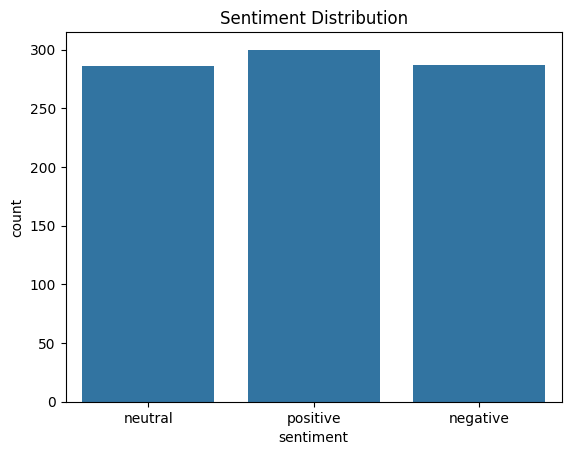

In [6]:
print(df.info())
print("\nClass distribution:\n", df['sentiment'].value_counts())

# Visualize class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [7]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['review'].apply(clean_text)
df[['review', 'clean_text']].head()


,review,clean_text
0,Quality is fair considering the price.,quality fair considering price
1,It is very efficient and saves time.,efficient saves time
2,Battery life is excellent and long-lasting.,battery life excellent longlasting
3,"Average quality, meets basic expectations.",average quality meets basic expectations
4,"Waste of money, do not recommend.",waste money recommend


In [9]:
df = df[df['sentiment'] != 'neutral']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']


print(f"Feature matrix shape: {X.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")



Feature matrix shape: (587, 132)
Train size: 469, Test size: 118


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete.")



Model training complete.


Accuracy: 0.9915254237288136

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.98      0.99        58
    positive       0.98      1.00      0.99        60

    accuracy                           0.99       118
   macro avg       0.99      0.99      0.99       118
weighted avg       0.99      0.99      0.99       118



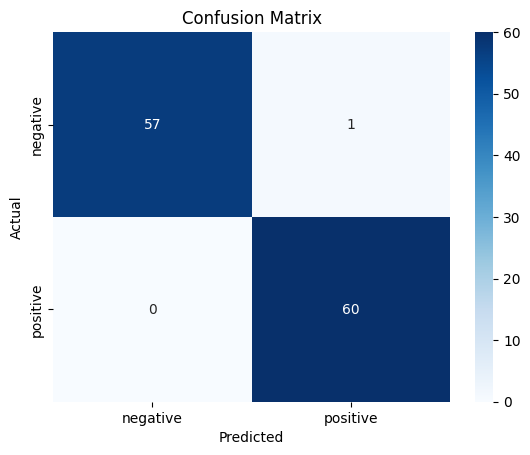

In [11]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [12]:
import os

# Create models directory if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

joblib.dump(model, "models/sentiment_model.pkl")
joblib.dump(vectorizer, "models/vectorizer.pkl")

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.
